In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_table(
    'car.data', 
    sep=',', 
    names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class_values"]
)

# df1 = df.drop(columns=['persons'], axis=3)
# print(df1)

df['buying'] = df['buying'].apply(lambda x: 1 if x=='low' else 2 if x== 'med' else 3 if x=='high' else 4)

df['maint'] = df['maint'].apply(lambda x: 1 if x=='low' else 2 if x== 'med' else 3 if x=='high' else 4)
df['doors'] = df['doors'].apply(lambda x: 5 if x == '5more' else x)
df['lug_boot'] = df['lug_boot'].apply(lambda x: 1 if x=='low' else 2 if x== 'med' else 3 if x=='high' else 4)
df['safety'] = df['safety'].apply(lambda x: 1 if x=='low' else 2 if x== 'med' else 3)
df['class_values'] = df['class_values'].apply(lambda x: 1 if x=='unacc' else 2 if x== 'acc' else 3 if x == 'good' else 4)

df1 = df.drop(columns=['persons'], axis=3)
print(df1)

# df1 = df.loc[:, df.columns != ['buying', 'persons']]

y = np.asarray(df[['buying']])
X = np.asarray(df[['maint', 'doors', 'lug_boot', 'safety', 'class_values']])


X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

      buying  maint doors  lug_boot  safety  class_values
0          4      4     2         4       1             1
1          4      4     2         4       2             1
2          4      4     2         4       3             1
3          4      4     2         2       1             1
4          4      4     2         2       2             1
...      ...    ...   ...       ...     ...           ...
1723       1      1     5         2       2             3
1724       1      1     5         2       3             4
1725       1      1     5         4       1             1
1726       1      1     5         4       2             3
1727       1      1     5         4       3             4

[1728 rows x 6 columns]


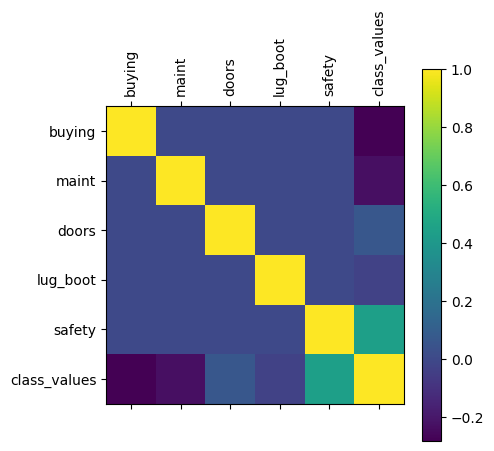

In [183]:
#Find out if there's any correlation between features
plt.matshow(df1.corr())
plt.xticks(np.arange(6), df1.columns, rotation=90)
plt.yticks(np.arange(6), df1.columns, rotation=0)
plt.colorbar()

#some corelation on safety and class_values
plt.show()


In [157]:
# Initialise classifier
logreg = LogisticRegression()

df = df.reset_index()

# Fit classifier into training data
logreg.fit(X_train, y_train)

# Predict results
y_pred = logreg.predict(X_test)

print(logreg.score(X,y))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.328125
[[19 15 38 61]
 [10 44 45 36]
 [17 35 29 43]
 [24 11 22 70]]
              precision    recall  f1-score   support

        high       0.27      0.14      0.19       133
         low       0.42      0.33      0.37       135
         med       0.22      0.23      0.22       124
       vhigh       0.33      0.55      0.42       127

    accuracy                           0.31       519
   macro avg       0.31      0.31      0.30       519
weighted avg       0.31      0.31      0.30       519



/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
